# DAY 4
## Multivariate Linear regreession

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [176]:
# Generate Data Which has multiple featuers (Multiple Column)
def generate_data(num):
    Xroom = np.random.randint(2,6,(num,1))
    Xschool = np.random.randint(0,2,(num,1))
    X = np.insert(Xschool,0,Xroom.T,axis=1)
    
    Yprice = np.random.randint(200,300,(num,1))
    theta = np.random.random((X.shape[1]+1,1))
    return (X,Yprice,theta)

def feature_normalize(X):
    Xnorm = np.zeros(X.shape)
    for i in range(X.shape[1]):
        Xchange = (X[:,i]-np.average(X[:,i]))/np.std(X[:,i])  
        Xnorm[:,i] = Xchange
            
    return Xnorm

# Cost Function
def Cost_function(h, Y):
    m = Y.shape[0]
    error = h - Y
    sqrError = np.power(error,2)
    sumOfError = np.sum(sqrError)
    J = 1/(2*m) * sumOfError
    return J

# Hyposhesis
def hypothesis(X, theta):
    h = X.dot(theta)
    
    return h

# Add Bais
def add_bais(X):
    Xbais = np.insert(X, 0, 1, axis=1)
    return Xbais

# Cost Vs. Iteration Graph
def CostVsItr(J_array,n):
    plt.figure(n)
    plt.plot(range(len(J_array)),J_array,'b')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost function')
    plt.grid(True)

In [177]:
# Training Phase
def train(X, Y, theta, itr=100,alpha=0.3,error=0):
    i = 0
    J_arr = []
    while i < itr:
        
        h = hypothesis(X, theta)
        temp = alpha * gradient(h, Y, X)
        theta = theta - temp
        
        
        J = Cost_function(h,Y)
        J_arr.append(J)
        
        i+=1
        
    return J_arr,theta

# Gradient Descent
def gradient(h,Y,X):
    m = h.shape[0]
    return (1/m)* ((h-Y).T.dot(X)).T

In [178]:
def Run(itr, alpha):
    X, Y, theta = generate_data(9)
    Xnorm = feature_normalize(X)
    Xbais = add_bais(Xnorm)
    h = hypothesis(Xbais, theta)
    print(f"Initial Cost: {Cost_function(h,Y)}")
    J_arr,theta = train(Xbais, Y, theta,itr,alpha)
    CostVsItr(J_arr,1)
    h = hypothesis(Xbais, theta)
    print(f'Final Cost: {J_arr[-1]}')

Initial Cost: 31115.85127792654
Final Cost: 245.12750348113047


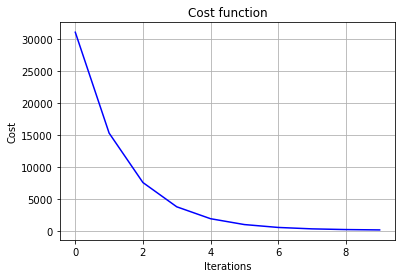

In [179]:
Run(itr=10, alpha = 0.3)